___

# Preço médio de casas de uma região

### ALUNOS: Enzo Quental, João Pedro Rodrigues, João Pedro Natal, João Pedro Fiorin.
### 2A

___
## Objetivo do projeto: 

* A partir de diversas características presentes em uma base de dados, visamos prever o valor de uma casa em uma região específica da Califórnia.
* O  nosso target pode ser classificado como quantitativo, sendo assim, queremos prever uma informação numérica.

___
## Desenvolvimento do projeto:
* O Projeto 2 de Cdados foi desenvolvido gradualmente e conjuntamente pelos integrantes do grupo. Fizemos reuniões constantes para acerto de objetivos e finalmente concluir o projeto. 

In [1]:
%matplotlib inline
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from math import *
from scipy.stats import norm, probplot
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from IPython.display import display

pd.set_option("display.max_colwidth", None)

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\jpthe\Documents\Ciencia de Dados\CD21-2-main\Projeto 2\p2cdados


Vamos implementar uma função utilitária para remover variáveis não necessárias na nossa análise:

In [3]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

____
## Descrição do DataSet:

* Os dados referem-se às casas encontradas em um determinado distrito da Califórnia e a algumas estatísticas resumidas sobre elas com base nos dados do censo.
* Link do DataSet : https://www.kaggle.com/camnugent/california-housing-prices


## Variáveis do DataSet: 

1. Longitude (Longitude): Uma medida de quão longe a oeste está uma casa; um valor mais alto está mais a oeste.
<br>
</br>
2. Latitude (Latitude): Uma medida de quão longe ao norte está uma casa; um valor mais alto está mais ao norte.
<br>
</br>
3. Housing median age (Idade média da casa): Idade média de uma casa dentro de um quarteirão; um número menor é uma residência mais nova.
<br>
</br>
4. Total rooms (Cômodos): Número total de cômodos em um quarteirão.
<br>
</br>
5. Total bedrooms (Dormitórios): Número total de dormitórios em um quarteirão.
<br>
</br>
6. Population (População): Número total de pessoas que residem em um quarteirão. 
<br>
</br>
7. Households (Domicílios): Número total de domicílios, um grupo de pessoas que residem em uma unidade domiciliar, para um quarteirão.
<br>
</br>
8. Median Income (Renda mediana):Renda mediana para famílias dentro de um quarteirão de casas (medida em dezenas de milhares de dólares americanos).
<br>
</br>
9. Median House Value (Valor médio da casa): Valor médio da casa para famílias dentro de um quarteirão (medido em dólares americanos).
<br>
</br>
10. Ocean Proximity (Proximidade do oceano): Localização da casa em relação a proximidade com o oceano ou mar.
<br>
</br>

___
## Introdução aos dados: 

Para começar a nossa leitura, vamos importar nossos dados do CSV em uma variável "data":

In [4]:
data = pd.read_csv("housing.csv")

Vamos mostrar um trecho de nossos dados, com o camando .head(), para ver como eles estão organizados.

In [5]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Na parte de análise de dados, um fator importante é analisar se temos a presença de variáveis com valores nulos ou NAN (Not A Number).
<br>
</br>
A função ISNULL () que utilizamos acima, retorna um valor especificado se a expressão for NULA e com o SUM() nós conseguimos somar a quantidade de vezes que isso ocorre. 

In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Como podemos observar, no nosso Dataframe temos a presença de 207 informações nulas, ou seja, iguais a 0, na variável total_rooms. 

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


A seguir, vamos retirar esses valores nulos. 

In [8]:
filtra_linhas_0 = data['total_bedrooms'] != 0
datan = data.loc[filtra_linhas_0, :]
datan = datan.dropna()
df = datan[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
            'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']]

In [9]:
datan.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Agora com a certeza de que os valores nulos foram retirados, vamos analisar novamente com um .describe().

In [10]:
datan.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Separando Target das Features: 

* Target : É a variável que queremos estudar no nosso projeto (variável de estudo).

* Features: São as variáveis que correlacionam e influenciam, de forma positiva ou negativa, os valores do nosso target. 

In [11]:
# Features classificadas como quantitativas:
X = datan[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'total_bedrooms', 'median_income', 'ocean_proximity']]

# Target a ser estudado: 
Y = datan['median_house_value']

In [12]:
# Definindo algumas variáveis que usaremos nos modelos:
Xd= pd.get_dummies(X)

train_data, test_data, train_labels, test_labels = train_test_split(Xd, Y, test_size = 0.3, random_state = 42)

Para finalizar a parte de organização e limpeza dos dados, vamos mudar a nossa única variável qualitativa para quantitativa.
<br>
</br>
Para fazer esse processo de troca, vamos usar o get_dummies() que é uma função que troca o valor das variávies qualitativas para quantitativas. Nesse caso os valores vão ser booleanos (0 e 1).

A atuação da função get_dummies() pode ser observada ao observar os valores booleanos no fim da nova planilha

In [31]:
Xd

,longitude,latitude,housing_median_age,total_rooms,population,households,total_bedrooms,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,129.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,1106.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,190.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,235.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,280.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,374.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,150.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,485.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,409.0,1.8672,0,1,0,0,0


___
## Análise exploratória das variáveis.

Na parte de analise exploratória nós iremos estudar as nossas variáveis do dataset através de tabelas, gráficos e etc...

### Pairplot:

Para começar a análise dos nossos dados, vamos mostrar como cada variável se comporta em relação a outra e observar se elas possuem alguma relação. Para isso vamos usar um comando da biblioteca seaborn (importada no código como sns) conhecido como pairplot. 

<IPython.core.display.Javascript object>


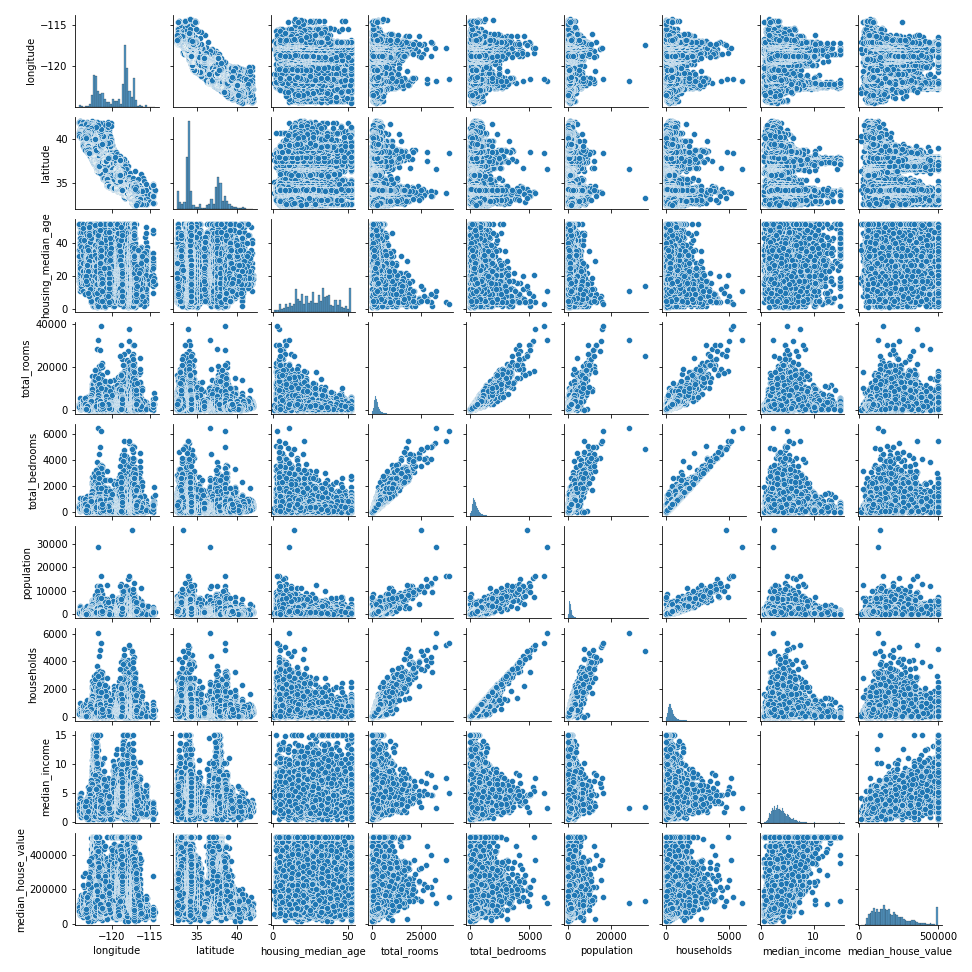

In [13]:
sns.pairplot(df, height=1.5);

Analisando o resultado acima, nós podemos ver que algumas variáveis não tem uma distribuição padronizada entre elas, ou seja, não tem uma relação significativa uma com a outra, como por exemplo o gráfico de "Housing median age" com "Median income" ou de "Housing median age" com "median_house_value". Por outro lado, temos variáveis que possuem um gráfico quase linear, o que nos indica uma boa e significativa relação entre elas, como no caso do gráfico de "Households" com "Total bedrooms".

* Com o uso do regress, nós vamos plotar uma tabela que nos mostre informações que as features possuem em relação ao nosso target. 
* Na coluna $P > |t|$, da tabela abaixo, quanto mais próximo de 0 o valor resultar, mais essa variável influencia no target, no nosso caso, o preço da casa. 

In [14]:
results = regress(train_labels,train_data)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2145.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:32:55   Log-Likelihood:            -1.7965e+05
No. Observations:               14303   AIC:                         3.593e+05
Df Residuals:                   14290   BIC:                         3.594e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.836e+06   8.83e+04    -20.782      0.000   -2.01e+06   -1.66e+06
longitude                  -2.639e+04   1221.707    -21.601      0.000   -2.88e+04    -2.4e+04
latitude                   -2.512e+04   1204.495    -20.852      0.000   -2.75e+04   -2.28e+04
housing_median_age          1103.7150     52.786     20.909      0.000    1000.247    1207.183
total_rooms                   -6.5185      0.949     -6.868      0.000      -8.379      -4.658
population                   -35.2604      1.241    -28.404      0.000     -37.694     -32.827
households                    38.7288      8.789      4.407      0.000      21.502      55.956
total_bedrooms               105.6840      8.185     12.912      0.000      89.640     121.728
median_income               3.928e+04    403.625     97.324      0.000    3.85e+04    4.01e+04
ocean_proximity_<1H OCEAN  -3.974e+05   1.93e+04    -20.577      0.000   -4.35e+05    -3.6e+05
ocean_proximity_INLAND     -4.373e+05   1.82e+04    -24.021      0.000   -4.73e+05   -4.02e+05
ocean_proximity_ISLAND     -2.041e+05   4.46e+04     -4.575      0.000   -2.92e+05   -1.17e+05
ocean_proximity_NEAR BAY   -4.029e+05   1.98e+04    -20.324      0.000   -4.42e+05   -3.64e+05
ocean_proximity_NEAR OCEAN -3.941e+05   1.97e+04    -19.992      0.000   -4.33e+05   -3.55e+05
==============================================================================
Omnibus:                     3628.657   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14271.367
Skew:                           1.216   Prob(JB):                         0.00
Kurtosis:                       7.247   Cond. No.                     1.41e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

A tabela de regressão OLS acima mostra as relações e características de cada variável do dataframe no objeto de estudo. Nesse caso, nós queremos estudar o preço médio das casas na Califórnia, então escolhemos a variável "median_house_value".

Como podemos ver, esse método teve o valor R² de 0,643. Durante nosso projeto, iremos focar nessa métrica para determinar qual caminho é melhor para nosso propósito.
<br>
</br>
No parte final desse notebook teremos os modelos.

___
Antes de fazer análise em Bloxplot, vamos ver como as variáveis são distribuídas em histogramas, para assim, entendermos melhor os próximos passos.

<IPython.core.display.Javascript object>


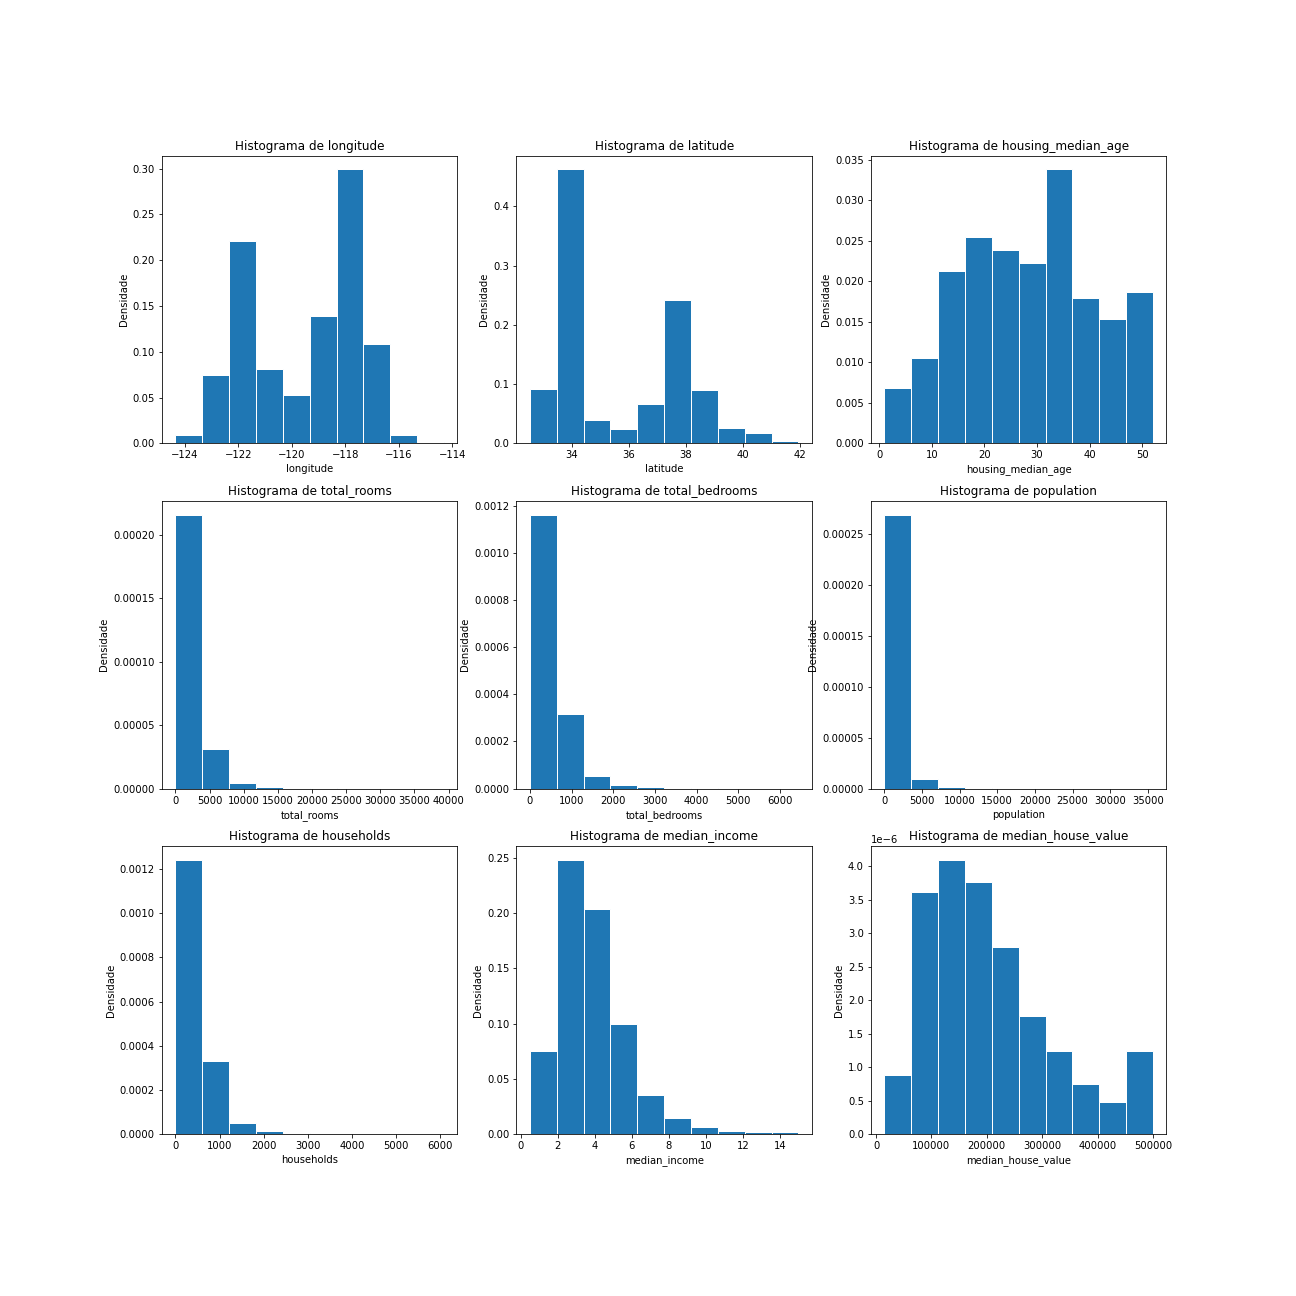

In [15]:
plt.figure(figsize = (18,18))
plt.subplot(331)
plt.hist(df['longitude'], edgecolor = 'white', density = True)
plt.title('Histograma de longitude')
plt.xlabel('longitude')
plt.ylabel('Densidade')
plt.show()

plt.subplot(332)
plt.hist(df['latitude'], edgecolor = 'white', density = True)
plt.title('Histograma de latitude')
plt.xlabel('latitude')
plt.ylabel('Densidade')
plt.show()

plt.subplot(333)
plt.hist(df['housing_median_age'], edgecolor = 'white', density = True)
plt.title('Histograma de housing_median_age')
plt.xlabel('housing_median_age')
plt.ylabel('Densidade')
plt.show()

plt.subplot(334)
plt.hist(df['total_rooms'], edgecolor = 'white', density = True)
plt.title('Histograma de total_rooms')
plt.xlabel('total_rooms')
plt.ylabel('Densidade')
plt.show()

plt.subplot(335)
plt.hist(df['total_bedrooms'], edgecolor = 'white', density = True)
plt.title('Histograma de total_bedrooms')
plt.xlabel('total_bedrooms')
plt.ylabel('Densidade')
plt.show()

plt.subplot(336)
plt.hist(df['population'], edgecolor = 'white', density = True)
plt.title('Histograma de population')
plt.xlabel('population')
plt.ylabel('Densidade')
plt.show()

plt.subplot(337)
plt.hist(df['households'], edgecolor = 'white', density = True)
plt.title('Histograma de households')
plt.xlabel('households')
plt.ylabel('Densidade')
plt.show()

plt.subplot(338)
plt.hist(df['median_income'], edgecolor = 'white', density = True)
plt.title('Histograma de median_income')
plt.xlabel('median_income')
plt.ylabel('Densidade')
plt.show()

plt.subplot(339)
plt.hist(df['median_house_value'], edgecolor = 'white', density = True)
plt.title('Histograma de median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Densidade')
plt.show()

Tendo em vista a análise de histogramas acima, a parte que vem a seguir fica de mais fácil compreensão. 
<br>
</br>
Nesta análise nós vamos usar o gráfico de caixa, ou Boxplot.
<br>
</br>
O Grafico de caixa nos mostra os valores de máximo e mínimo, o primeiro e terceiro quartil, a mediana e os outliers da variável. (Podemos perceber essas características nos histogramas também.)
<br>
</br>
*Outliers são os valores que fogem da normalidade dos outros podendo causar anomalias nos resultados de média e entre outros.

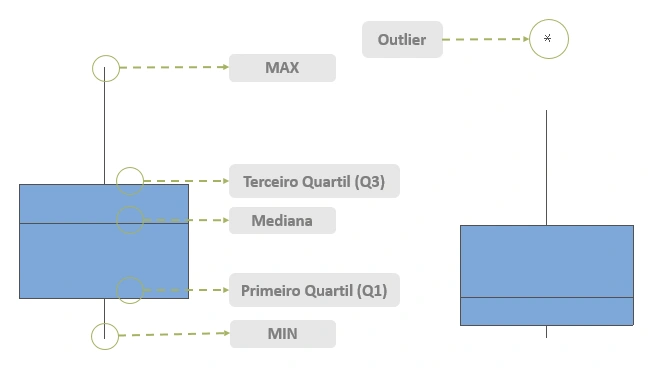

<IPython.core.display.Javascript object>


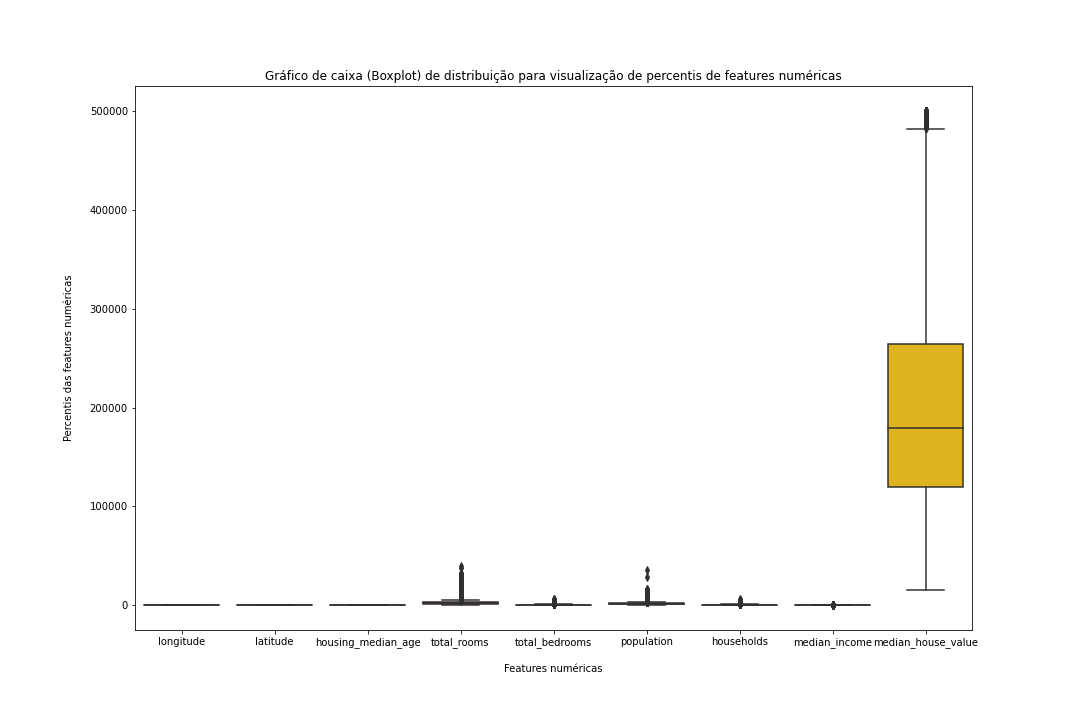

In [16]:
# Plotando o boxplot para uma visualização dos percentis das features numéricas.
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, palette='bright')
plt.title('Gráfico de caixa (Boxplot) de distribuição para visualização de percentis de features numéricas')
plt.xlabel('\nFeatures numéricas')
plt.ylabel('Percentis das features numéricas\n')
plt.show()

Como nós podemos perceber no gráfico acima, a variável median_house_value possui valores mais altos do que as outras variáveis, deixando-as quase imperceptíveis. 
<br>
</br>
Para resolver isso e conseguirmos analisar as outras variáveis, vamos plotar um Bloxplot retirando a variável median_house_value.

<IPython.core.display.Javascript object>


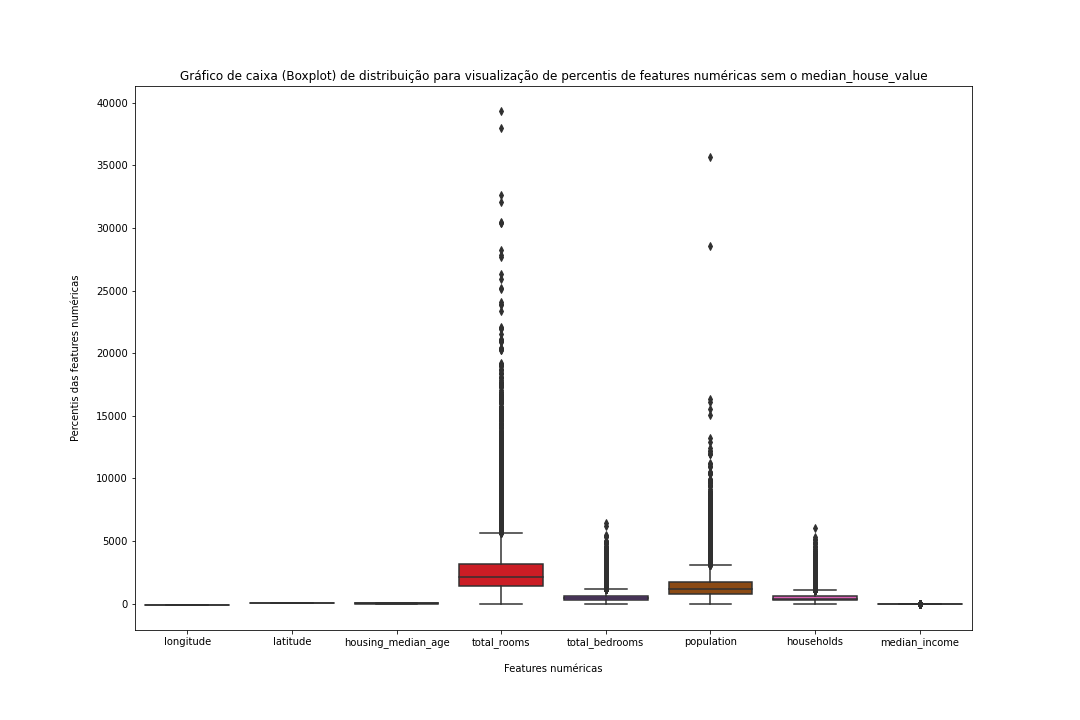

In [17]:
df_boxplot = datan[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
            'population', 'households', 'median_income']]
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_boxplot, palette='bright')
plt.title('Gráfico de caixa (Boxplot) de distribuição para visualização de percentis de features numéricas sem o median_house_value')
plt.xlabel('\nFeatures numéricas')
plt.ylabel('Percentis das features numéricas\n')
plt.show()

Um ponto interessante a notar nesse gráfico é que nas variáveis longitude e latitude os valores são muito próximos que não chega a criar uma box. Isso ocorre porque estamos pegando informaçãoes de uma mesma região, ou seja, quase a mesma, com muita pouca variação, longitude e latitude.

___ 
Passando para outro ferramental de análise, nós iremos usar um heatmap. Nele calculamos a correlação entre as variáveis. 
<br>
</br>
Correlação é um número entre 1 e -1 que nos mostra quanto uma variável se correlaciona com a outra. Para números mais perto de 1, maior é a correlação, já para números mais perto de -1, o contrário. 

<IPython.core.display.Javascript object>


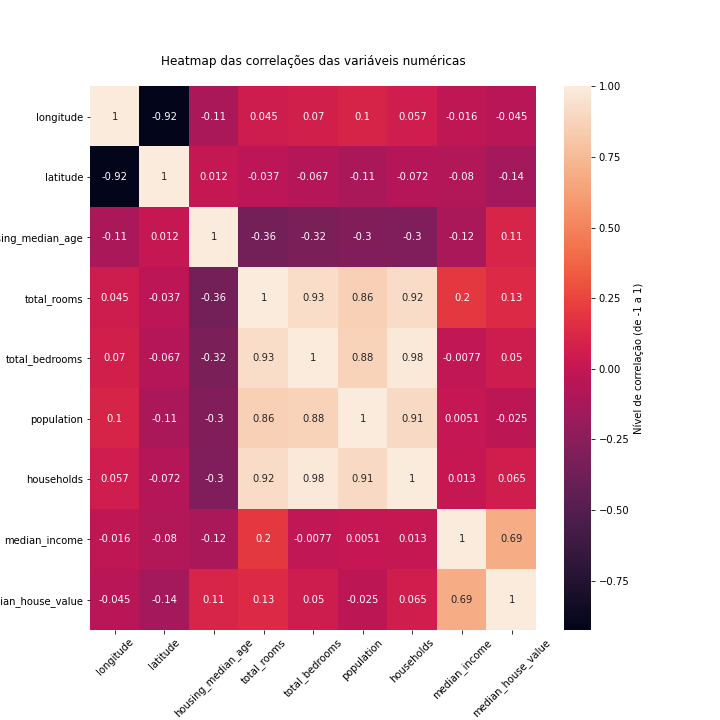

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cbar_kws={'label': 'Nível de correlação (de -1 a 1)'})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Heatmap das correlações das variáveis numéricas\n')
plt.show()

___
## Modelos preditivos

Para realizar as predições, decidimos utilizar a regressão que é um método que tem como objetivo determinar quais variáveis independentes possuem um impacto em uma variável dependente. Nesse projeto, vamos utilizar 3 tipos de regressão:

* Decision Tree Regressor
* Random Forest Regression
* Lasso

## Modelo Decision Tree Regressor

A árvore de decisão cria modelos de regressão ou classificação na forma de uma estrutura de árvore. Ele divide um conjunto de dados em subconjuntos cada vez menores enquanto, ao mesmo tempo, uma árvore de decisão associada é desenvolvida de forma incremental. O resultado final é uma árvore com nós de decisão e nós folha. Um nó de decisão tem dois ou mais ramos, cada um representando valores para o atributo testado. O nó folha representa uma decisão no alvo numérico. O nó de decisão superior em uma árvore que corresponde ao melhor preditor chamado nó raiz. As árvores de decisão podem lidar com dados categóricos e numéricos

regressor = dt(random_state=42)
cross_val_dt = cross_val_score(regressor, train_data, train_labels, cv=10)
fit_dt = regressor.fit(train_data,train_labels)
predictions_dt = regressor.predict(test_data)

Nós utilizaremos métricas de avaliação, como o R² score, para concluírmos se nosso modelo é adequado para nosso objetivo.
<br>
</br>
Além disso, utilizaremos Root Mean Squared Error (RMSE) e Mean Absolute Error (MAE).
<br>
</br>
O R² score indica o quanto que a variância de uma variável explica a variância da outra.
<br>
</br>
O RMSE é utilizado frequentemente para demosntrar as diferenças entre certos valores.
<br>
</br>
O MAE é uma medida de erros entre observações pareadas que expressam o mesmo fenômeno.

In [20]:
#Métricas de avaliação
score_dt = r2_score(test_labels, predictions_dt)
mae_dt = mean_absolute_error(test_labels, predictions_dt)
rmse_dt = mean_squared_error(test_labels, predictions_dt,squared=False)
tabela = {'Valores' :{
    'R² score' : score_dt,
    'Root mean squared error' : rmse_dt,
    'Mean absolute error' : mae_dt
    }
}
display(pd.DataFrame(tabela))

,Valores
Mean absolute error,42282.848613
Root mean squared error,66906.919058
R² score,0.664199


### Resíduos do modelo: 
Os resíduos são calculados pela diferença entre o valor real menos o valor previsto pelo modelo.
<br>
</br>
Quanto mais perto de zero esse valor resulta, mais eficiente foram as previsões do modelo. 

In [21]:
residuos_dt = test_labels - predictions_dt
pd.Series(residuos_dt).describe()

count      6130.000000
mean       1194.034258
std       66901.720856
min     -412501.000000
25%      -23300.000000
50%           0.000000
75%       25000.000000
max      395000.000000
Name: median_house_value, dtype: float64

<IPython.core.display.Javascript object>


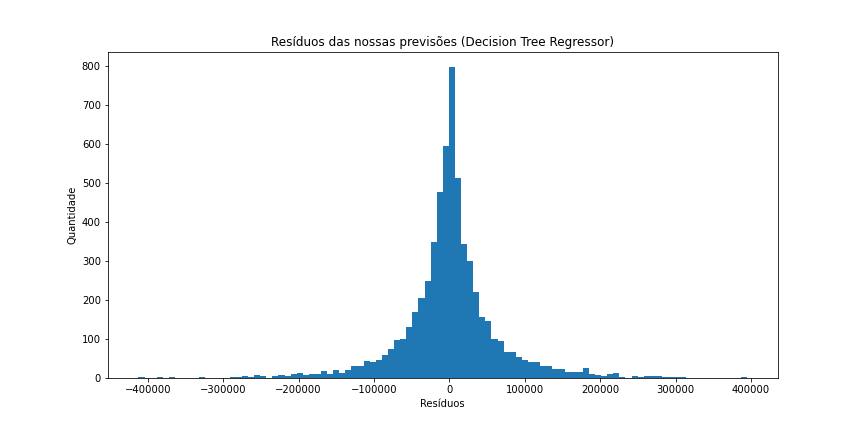

In [22]:
plt.figure(figsize=(12,6))
plt.hist(residuos_dt, bins=100)
plt.title('Resíduos das nossas previsões (Decision Tree Regressor)')
plt.xlabel('Resíduos')
plt.ylabel('Quantidade')
plt.show()

Através da analise do gráfico, podemos concluir que nosso modelo previu bem os valores das casas, com valores concentrados no 0. É uma ótima alternativa ao Random Forest Regression. 

## Modelo Random Forest Regression

Esse modelo tem como característica a utilização de várias árvores de decisão com o objetivo de alcançar um valor final. Esse modelo consome muito processamento, e, a partir de 1000 estimadores, já não encontra tamanha mudança no output. 

In [23]:
# Criando modelo
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, n_jobs = -1)
rf.fit(train_data, train_labels)

# Criando previsões
predictions_rf = rf.predict(test_data)

O argumento "n_jobs = -1" tira o limite de núcleos e permite um cálculo muito mais rápido.

In [24]:
score_rf = r2_score(test_labels, predictions_rf)
mae_rf = mean_absolute_error(test_labels, predictions_rf)
rmse_rf = mean_squared_error(test_labels, predictions_rf,squared=False)
tabela = {'Valores' :{
    'R² score' : score_rf,
    'Root mean squared error' : rmse_rf,
    'Mean absolute error' : mae_rf
    }
}
display(pd.DataFrame(tabela))

,Valores
Mean absolute error,31404.608522
Root mean squared error,48462.784531
R² score,0.823820


### Resíduos do modelo: 

In [25]:
residuos_rf = test_labels - predictions_rf
pd.Series(residuos_rf).describe()

count      6130.000000
mean        417.547957
std       48464.938989
min     -312856.521000
25%      -21940.450500
50%       -4343.206500
75%       15392.438250
max      355852.400000
Name: median_house_value, dtype: float64

<IPython.core.display.Javascript object>


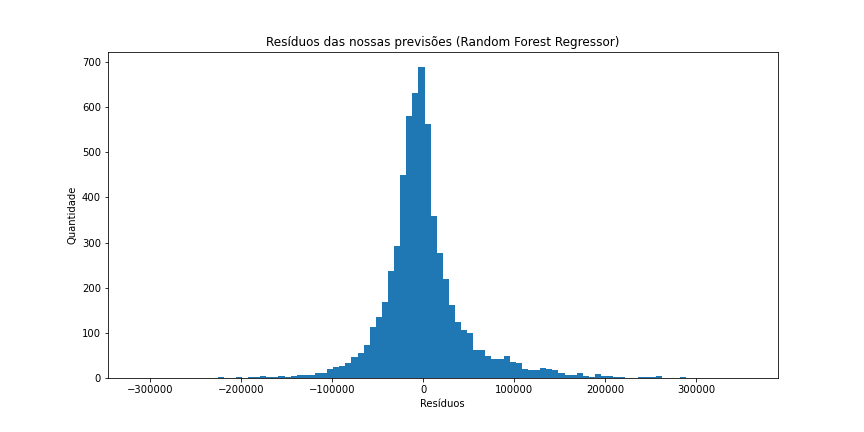

In [26]:
plt.figure(figsize=(12,6))
plt.hist(residuos_rf, bins=100)
plt.title('Resíduos das nossas previsões (Random Forest Regressor)')
plt.xlabel('Resíduos')
plt.ylabel('Quantidade')
plt.show()

O modelo Random Forest Regression teve um ótimo desempenho, como pode ser visto nos resultados expostos. Além disso, o gráfico gerado mostra uma distribuição muito consistente e com poucos outliers. O maior problema desse modelo é o consumo elevado de capacidade de processamento do computador.

## Modelo Lasso (Least Absolute Shrinkage and Selection Operator)

A regressão de Lasso é um tipo de regressão linear que utiliza shrinkage. O shrinkage é uma função que faz com que os dados tendam a um ponto central. A partir daí, uma penalidade é atribuída a magnitude dos coeficientes. Optamos esse modelo como nossa última opção devido a sua simplicidade. Dessa forma, nós estamos colocando um modelo simples para concluir se a complexidade dos outros modelos vale a pena.

In [27]:
las = Lasso(alpha=0.000001, fit_intercept=False, tol=0.0000001, max_iter=1000000000, positive=True)
las.fit(train_data, train_labels)


predictions_las = las.predict(test_data)

In [28]:
score_las = r2_score(test_labels, predictions_las)
mae_las = mean_absolute_error(test_labels, predictions_las)
rmse_las = mean_squared_error(test_labels, predictions_las,squared=False)
tabela = {'Valores' :{
    'R² score' : score_las,
    'Root mean squared error' : rmse_las,
    'Mean absolute error' : mae_las
    }
}
display(pd.DataFrame(tabela))

,Valores
Mean absolute error,52898.624798
Root mean squared error,72221.176895
R² score,0.608737


### Resíduos do modelo: 
   * Os resíduos são calculados pela diferença entre o valor real menos o valor previsto pelo modelo. 
   * Quanto mais perto de zero esse valor resulta, mais eficiente foram as previsões do modelo. 

In [29]:
# Encontrando os resíduos do nosso modelo
residuos_las = test_labels - predictions_las

# Visualizando estatisticamente nossos resíduos
pd.Series(residuos_las).describe()

count      6130.000000
mean        289.584513
std       72226.487791
min     -374016.774497
25%      -45826.797449
50%      -12761.040771
75%       29949.133441
max      420837.316532
Name: median_house_value, dtype: float64

<IPython.core.display.Javascript object>


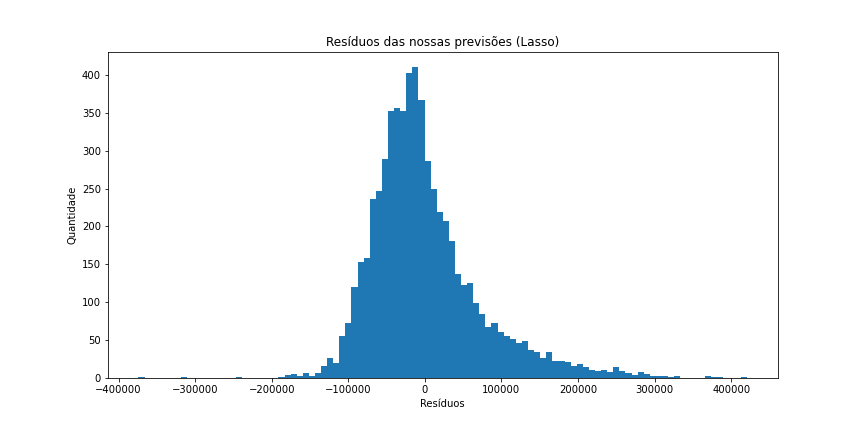

In [32]:
plt.figure(figsize=(12,6))
plt.hist(residuos_las, bins=100)
plt.title('Resíduos das nossas previsões (Lasso)')
plt.xlabel('Resíduos')
plt.ylabel('Quantidade')
plt.show()

O modelo Lasso não teve uma boa performance, uma vez que apresentou métricas muito ruins. Isso pode ser atribuído à maior simplicidade desse processo. E, como pode ser visto no gráfico acima, a concentração dos resíduos está mais deslocada do centro do que nos outros casos.
<br>
</br>Dessa forma, concluímos que esse foi o pior modelo entre aqueles que foram utilizados.  

## Conclusão:

Após analisarmos os resultados provenientes dos modelos, nós concluímos que o modelo que melhor correspondeu com nossas expectativas é o Random Forest Regression.

* apresenta o maior R² score, 0.82
* menor quantidade de outliers
* maior concentração dos resíduos perto de 0


Os outros modelos utilizados são úteis e funcionam para diversos casos, mas, infelizmente, não fornecem os melhores resultados para nosso objetivo.